# Importing zip file

In [ ]:
'''
zip id:   1N5QG8rbKQNcaEOdPfSZZNQl_HeCkRn1n
'''

#@title Dataset Uploader
file_id = "1N5QG8rbKQNcaEOdPfSZZNQl_HeCkRn1n" #@param {type:"string"} 
!pip install -U -q PyDrive 

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html
from google.colab import auth
auth.authenticate_user()
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')
# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1gLBqEWEBQDYbKCDigHnUXNTkzl-OslSO
import io
from googleapiclient.http import MediaIoBaseDownload
request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()
fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file
!unzip {fileId['title']}

# Assignment - 1

## Importing the libraries

In [ ]:
import gc
gc.collect()

44

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df0 = pd.read_csv('firmware/firmware.csv')
df0

,filename,class,target,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel986,pixel987,pixel988,pixel989,pixel990,pixel991,pixel992,pixel993,pixel994,pixel995,pixel996,pixel997,pixel998,pixel999,pixel1000,pixel1001,pixel1002,pixel1003,pixel1004,pixel1005,pixel1006,pixel1007,pixel1008,pixel1009,pixel1010,pixel1011,pixel1012,pixel1013,pixel1014,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,Unnamed: 1027
0,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
1,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
2,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,238,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
3,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,0,0,0,34,0,0,0,NaN
4,x86__64__lsb__unix-system-v__clang-3.8.0__O0__...,malware,1,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
38883,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,68,34,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
38884,x86__64__lsb__unix-system-v__llvm-obfuscator-3...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,68,34,0,0,0,0,0,0,0,0,0,0,0,...,17,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,102,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,NaN
38885,x86__64__lsb__unix-system-v__clang-3.9.0__O0__...,benignware,0,85,17,34,34,0,17,17,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,102,51,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


## Data Preprocessing

In [ ]:
dataset = df0[['filename','class']]
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [ ]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

**Splitting the dataset**

In [ ]:
seed = 55

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
gc.collect()

(31109, 38887)
(31109, 3)
(7778, 38887)
(7778, 3)


102

## Experiment 1

In [ ]:
ann = tf.keras.models.Sequential()

**input layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

**hidden layers**

In [ ]:
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))
ann.add(tf.keras.layers.Dense(units=100, activation='linear'))

**output layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=3, activation='linear'))

In [ ]:
ann.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras import backend as K
K.set_value(ann.optimizer.learning_rate, 0.001)

In [ ]:
history = ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
1556/1556 [==============================] - 26s 16ms/step - loss: 5.2127 - accuracy: 0.4287
Epoch 2/100
1556/1556 [==============================] - 25s 16ms/step - loss: 6.4263 - accuracy: 0.2083
Epoch 3/100
1556/1556 [==============================] - 25s 16ms/step - loss: 7.7963 - accuracy: 0.2572
Epoch 4/100
1556/1556 [==============================] - 26s 17ms/step - loss: 7.9137 - accuracy: 0.3275
Epoch 5/100
1556/1556 [==============================] - 24s 15ms/step - loss: 7.8465 - accuracy: 0.3914
Epoch 6/100
1556/1556 [==============================] - 23s 15ms/step - loss: 7.8033 - accuracy: 0.3949
Epoch 7/100
1556/1556 [==============================] - 22s 14ms/step - loss: 7.7527 - accuracy: 0.3924
Epoch 8/100
1556/1556 [==============================] - 22s 14ms/step - loss: 7.7192 - accuracy: 0.3277
Epoch 9/100
1556/1556 [==============================] - 22s 14ms/step - loss: 7.6826 - accuracy: 0.3205
Epoch 10/100
1556/1556 [==============================]

In [ ]:
gc.collect()

881

**Result Analysis**

In [ ]:
predictions = (ann.predict(X_test) > 0.5).astype(int)
for i in range(3):
	print(predictions[i], y_test[i])

[1 1 1] [ 0.14858067 -0.04680213 -0.14070567]
[1 1 1] [ 0.14858067 -0.04680213 -0.14070567]
[1 1 1] [ 0.14858067 -0.04680213 -0.14070567]


In [ ]:
predictions

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [ ]:
print("Evaluate on test data")
results = ann.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
61/61 [==============================] - 1s 20ms/step - loss: 15.2492 - accuracy: 0.9784
test loss, test acc: [15.249238014221191, 0.9784005880355835]


dict_keys(['loss', 'accuracy'])


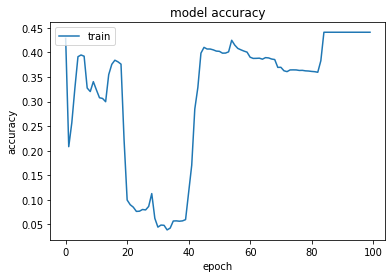

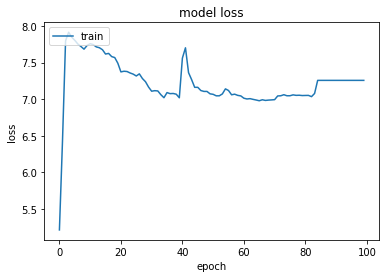

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()